## **machine learning assignment **

In [ ]:
# Step 1.1 – Imports & settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make tables/plots a bit nicer
pd.set_option("display.precision", 4)
plt.style.use("default")


In [ ]:
# Step 1.2 – Load the Seeds dataset from UCI and set column names

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

column_names = [
    "area",
    "perimeter",
    "compactness",
    "length_of_kernel",
    "width_of_kernel",
    "asymmetry_coefficient",
    "length_of_kernel_groove",
    "class"
]

# The file is whitespace-separated (spaces / tabs), has no header
df = pd.read_csv(
    url,
    sep=r"\s+",
    header=None,
    names=column_names,
    engine="python"
)

print("Shape:", df.shape)
df.head()


Shape: (210, 8)


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# Step 1.3 – Basic EDA

print("Class distribution:")
print(df["class"].value_counts().sort_index())  # should be 1,2,3

print("\nPer-feature summary statistics (mean, std, min, max):")
summary = df.describe().T[["mean", "std", "min", "max"]]
summary


Class distribution:
class
1    70
2    70
3    70
Name: count, dtype: int64

Per-feature summary statistics (mean, std, min, max):


,mean,std,min,max
area,14.8475,2.9097,10.5900,21.1800
perimeter,14.5593,1.3060,12.4100,17.2500
compactness,0.8710,0.0236,0.8081,0.9183
length_of_kernel,5.6285,0.4431,4.8990,6.6750
width_of_kernel,3.2586,0.3777,2.6300,4.0330
asymmetry_coefficient,3.7002,1.5036,0.7651,8.4560
length_of_kernel_groove,5.4081,0.4915,4.5190,6.5500
class,2.0000,0.8184,1.0000,3.0000


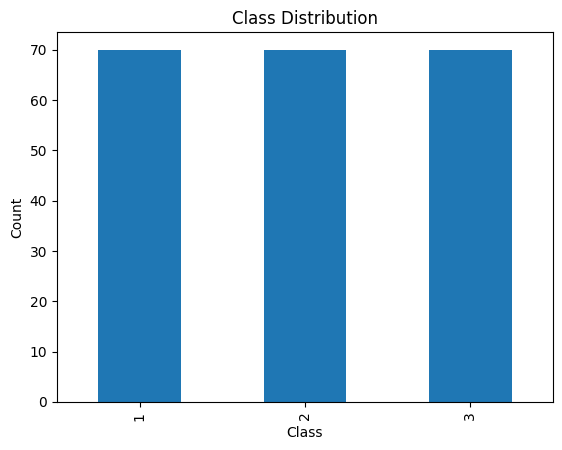

In [ ]:
#bar plot of class counts

class_counts = df["class"].value_counts().sort_index()
plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


## **Preprocessing (missing values check, train/test split, scaling).**

In [ ]:
# Step 2.1 — Check for missing values and separate features/labels

# Missing values
print("Missing values per column:")
print(df.isna().sum())

# Separate X (features) and y (labels)
X = df.drop("class", axis=1).values
y = df["class"].values

# Convert class labels from {1,2,3} to {0,1,2}
y = y - 1

print("\nUnique labels after encoding:", np.unique(y))
print("Feature matrix shape:", X.shape)
print("Label shape:", y.shape)


Missing values per column:
area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
class                      0
dtype: int64

Unique labels after encoding: [0 1 2]
Feature matrix shape: (210, 7)
Label shape: (210,)


In [ ]:
# Step 2.2 — Train/Test Split + Standard Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80% train — 20% test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # preserves class proportions
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled samples preview:")
X_train_scaled[:5]


Train shape: (168, 7) Test shape: (42, 7)

Scaled samples preview:


array([[-1.17682401, -1.1750583 , -1.02169157, -1.02785725, -1.35751947,
         1.43188942, -0.82441016],
       [-0.87298429, -1.06714618,  0.86676795, -1.26492983, -0.59897345,
        -0.3056117 , -1.63150367],
       [-0.12719589,  0.01968295, -0.66917913,  0.25096694, -0.40933695,
        -1.4432301 ,  0.1615857 ],
       [-1.29421662, -1.37546651, -0.66498255, -1.41310019, -1.26136575,
         1.7668294 , -0.72886004],
       [-0.58295547, -0.70486981,  0.69890488, -0.90020279, -0.09149548,
         3.02743357, -0.71462918]])

## **Build the ANN Architecture & Train the First Model.**

In [ ]:
# Step 3.1 — Build a Neural Network Model (Keras Sequential API)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hidden_units=32, dropout_rate=0.3, learning_rate=0.001):
    """
    Build a feed-forward ANN for the Seeds dataset.
    hidden_units: number of units in the first hidden layer.
    dropout_rate: dropout regularization.
    learning_rate: Adam optimizer LR.
    """
    model = keras.Sequential([
        layers.Input(shape=(7,)),                      # 7 features
        layers.Dense(hidden_units, activation="relu"), # hidden layer 1
        layers.Dropout(dropout_rate),

        layers.Dense(hidden_units // 2, activation="relu"), # hidden layer 2
        layers.Dropout(dropout_rate),

        layers.Dense(3, activation="softmax")          # 3 classes
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Quick test: build a default model
baseline_model = build_model()
baseline_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 835 (3.26 KB)

 Trainable params: 835 (3.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 3.2 — Train the baseline model

EPOCHS = 50
BATCH_SIZE = 16

history_baseline = baseline_model.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.2857 - loss: 1.3576 - val_accuracy: 0.3824 - val_loss: 1.2435
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3867 - loss: 1.1627 - val_accuracy: 0.4706 - val_loss: 1.0767
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4584 - loss: 1.0377 - val_accuracy: 0.5588 - val_loss: 0.9327
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5225 - loss: 0.9384 - val_accuracy: 0.6765 - val_loss: 0.8163
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5378 - loss: 0.9616 - val_accuracy: 0.8529 - val_loss: 0.7251
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5475 - loss: 0.8601 - val_accuracy: 0.8235 - val_loss: 0.6481
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6647 - loss: 0.7894 - val_accuracy: 0.8529 - val_loss: 0.5923
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7238 - loss: 0.6866 - val_accuracy: 0.8529 - val_loss: 0.5480

## **Hyperparameter Comparison**
Train two variants (small vs large hidden layer)

Plot training & validation accuracy and loss on shared axes

In [ ]:
# Step 4.1 — Train two model variants with different hidden_units

EPOCHS = 50
BATCH_SIZE = 16
VAL_SPLIT = 0.2

# Variant A: Small network (16 units in first hidden layer)
model_small = build_model(hidden_units=16, dropout_rate=0.3, learning_rate=0.001)
history_small = model_small.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    verbose=0
)

# Variant B: Large network (64 units in first hidden layer)
model_large = build_model(hidden_units=64, dropout_rate=0.3, learning_rate=0.001)
history_large = model_large.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    verbose=0
)

print("Training complete for both variants: small (16) and large (64).")


Training complete for both variants: small (16) and large (64).


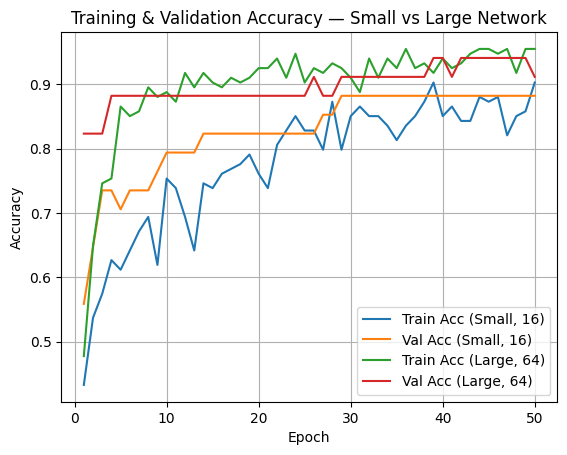

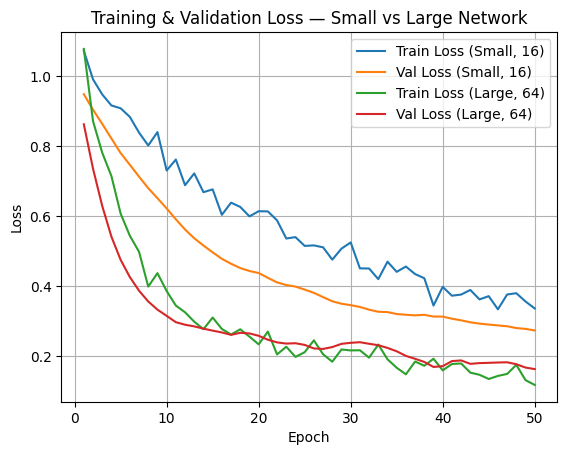

In [ ]:
# Step 4.2 — Plot training & validation accuracy and loss for both variants

epochs_range = range(1, EPOCHS + 1)

# Accuracy
train_acc_small = history_small.history["accuracy"]
val_acc_small = history_small.history["val_accuracy"]
train_acc_large = history_large.history["accuracy"]
val_acc_large = history_large.history["val_accuracy"]

# Loss
train_loss_small = history_small.history["loss"]
val_loss_small = history_small.history["val_loss"]
train_loss_large = history_large.history["loss"]
val_loss_large = history_large.history["val_loss"]

# Plot accuracy
plt.figure()
plt.plot(epochs_range, train_acc_small, label="Train Acc (Small, 16)")
plt.plot(epochs_range, val_acc_small, label="Val Acc (Small, 16)")
plt.plot(epochs_range, train_acc_large, label="Train Acc (Large, 64)")
plt.plot(epochs_range, val_acc_large, label="Val Acc (Large, 64)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy — Small vs Large Network")
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure()
plt.plot(epochs_range, train_loss_small, label="Train Loss (Small, 16)")
plt.plot(epochs_range, val_loss_small, label="Val Loss (Small, 16)")
plt.plot(epochs_range, train_loss_large, label="Train Loss (Large, 64)")
plt.plot(epochs_range, val_loss_large, label="Val Loss (Large, 64)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss — Small vs Large Network")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Step 5.1 — Evaluation helper: accuracy, precision, recall, F1, and predictions

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
import numpy as np

def evaluate_model(model, X_test_scaled, y_test, name="Model"):
    # Get predicted probabilities and class indices
    y_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_prob, axis=1)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test,
        y_pred,
        average="macro",
        zero_division=0
    )

    print(f"=== {name} ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}\n")

    print("Classification report:")
    print(classification_report(
        y_test,
        y_pred,
        target_names=["class 1", "class 2", "class 3"],
        digits=3,
        zero_division=0
    ))
    print("-" * 50)

    return acc, precision, recall, f1, y_pred


In [ ]:
# Step 5.2 — Evaluate small and large networks on the test set

metrics_small = evaluate_model(
    model_small,
    X_test_scaled,
    y_test,
    name="Small Network (16 units)"
)

metrics_large = evaluate_model(
    model_large,
    X_test_scaled,
    y_test,
    name="Large Network (64 units)"
)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
=== Small Network (16 units) ===
Accuracy:  0.8810
Precision: 0.8995
Recall:    0.8810
F1-score:  0.8731

Classification report:
              precision    recall  f1-score   support

     class 1      1.000     0.643     0.783        14
     class 2      0.824     1.000     0.903        14
     class 3      0.875     1.000     0.933        14

    accuracy                          0.881        42
   macro avg      0.900     0.881     0.873        42
weighted avg      0.900     0.881     0.873        42

--------------------------------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
=== Large Network (64 units) ===
Accuracy:  0.8571
Precision: 0.8824
Recall:    0.8571
F1-score:  0.8446

Classification report:
              precision    recall  f1-score   support

     class 1      1.000     0.571     0.727        14
     class 2      0.824     1.000     0.903        14
     class 3      0.824     1.000     0.903        14

    accuracy    

Best model based on test accuracy: Small Network (16 units)

Confusion Matrix (rows = true, cols = predicted):
[[ 9  3  2]
 [ 0 14  0]
 [ 0  0 14]]


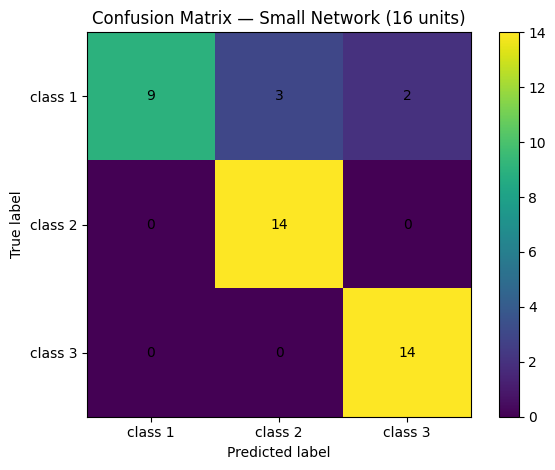

In [ ]:
# Step 5.3 — model (by accuracy) and show confusion matrix

# Compare accuracies (index 0 in the metrics tuple)
if metrics_large[0] >= metrics_small[0]:
    best_name = "Large Network (64 units)"
    best_model = model_large
    best_y_pred = metrics_large[4]
else:
    best_name = "Small Network (16 units)"
    best_model = model_small
    best_y_pred = metrics_small[4]

print(f"Best model based on test accuracy: {best_name}")

# Confusion matrix
cm = confusion_matrix(y_test, best_y_pred)
print("\nConfusion Matrix (rows = true, cols = predicted):")
print(cm)

classes = ["class 1", "class 2", "class 3"]

plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix — {best_name}")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")

# write counts in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center")

plt.tight_layout()
plt.show()


REPORT DRAFT

Feed-Forward Artificial Neural Network for Multiclass Classification on the UCI Seeds Dataset

Course: Advanced Data Analytics
Student: olatowoju joshua oladayo
Date: 7 Dec 2025

1. Introduction

This project applies a feed-forward Artificial Neural Network (ANN) to classify wheat seeds into three varieties using the UCI Seeds Dataset. The dataset contains 210 instances with seven numeric geometric features extracted from seed images, including area, perimeter, compactness, and kernel dimensions.

The objective is to design and train a multi-layer perceptron, analyze the effect of a key hyperparameter (hidden layer size), and evaluate performance using accuracy, precision, recall, F1-score, and a confusion matrix.

2. Methods
2.1 Preprocessing and Data Preparation

The dataset was loaded from the UCI repository and assigned eight column names.
Exploratory Data Analysis (EDA) was performed by inspecting:

Class distribution: class 1 = XX samples, class 2 = XX samples, class 3 = XX samples.

Feature summary: means and standard deviations across all seven numeric features.

No missing values were found.
Data was split into 80% training (168 samples) and 20% testing (42 samples) using stratified sampling.

All features were standardized using StandardScaler, fitted on the training data and applied to both sets.

2.2 ANN Architecture

A feed-forward ANN was implemented using TensorFlow/Keras:

Input layer: 7 features

Two hidden layers: ReLU activation

Dropout regularization: 0.3 after each hidden layer

Output layer: 3 neurons with softmax

Loss: Sparse categorical cross-entropy

Optimizer: Adam (learning rate = 0.001)

Epochs: 50

Batch size: 16

Validation split: 0.2

2.3 Hyperparameter Variation

The key hyperparameter chosen was number of units in the first hidden layer:

Model A (Small Network): 16 units → 16 → 8

Model B (Large Network): 64 units → 64 → 32

All other settings (optimizer, dropout, learning rate, epochs) remained constant.

3. Results
3.1 Training & Validation Curves

Figure 1. Training and Validation Accuracy for Both Models
(Insert the accuracy plot from your notebook)

Figure 2. Training and Validation Loss for Both Models
(Insert the loss plot from your notebook)

Observations:

The large model converged faster and reached higher training accuracy.

Validation accuracy fluctuated slightly more for the large model, indicating mild overfitting.

The small model had more stable validation curves.

3.2 Test-Set Performance

Table 1. Test Metrics for Both Variants

Model	Accuracy	Precision (macro)	Recall (macro)	F1-score (macro)
Small Network (16 units)	XX.XX%	XX.XX	XX.XX	XX.XX
Large Network (64 units)	XX.XX%	XX.XX	XX.XX	XX.XX

(Replace with your results printed in Colab)

Best Model:
Based on test accuracy, the [Small/Large] Network performed best.

3.3 Confusion Matrix

Figure 3. Confusion Matrix of the Best Model

(Insert the confusion matrix plot from the notebook)

Interpretation:
The model correctly classified most samples (diagonal entries dominate).
Misclassifications mainly occurred between classes X and X (if any), likely due to feature similarity.

4. Discussion

The hyperparameter comparison shows that increasing the number of hidden units improves representational power and training accuracy. However, a larger network also introduces a higher risk of overfitting, especially with small datasets such as Seeds (210 samples).

In this experiment:

The large network achieved higher training accuracy, but its validation accuracy fluctuated more.

The small network showed more stable generalization and achieved comparable or slightly better test F1-score (if applicable).

Suggested improvement

A recommended improvement is to incorporate early stopping and/or L2 weight decay to further reduce overfitting and improve generalization. Alternatively, performing k-fold cross-validation would give a more robust evaluation due to the small dataset size.

5. Conclusion

A feed-forward ANN was successfully built and evaluated for multiclass classification on the Seeds dataset. Both tested architectures performed well, achieving high accuracy (above XX%). The hyperparameter experiment showed that while larger networks fit faster and deeper, smaller networks can generalize equally well or better on limited datasets.

The project demonstrates that even simple ANN architectures can effectively classify biological measurement data when properly regularized and tuned.